## Finance and Risk Analytics by:
- **Naheed Anjum**
- **Shantam Garg**
- **Shreyas Singhal**

## Problem Statement:
   

In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers. A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor. Consider ourselves working for an associate at an investment firm that manages accounts for private clients. Our role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement.


### Business Requirement:

Being a portfolio manager, the task is to provide consultation to two different investors, considered as Private Clients, i.e Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives

- The primary goal of this Case Study:

-   To Suggest a Portfolio of stocks to Mr Patrick Jyenger based on his risk profile to meet his goal on doubling the amount of 500K Dollars in five years of timespan to buy a minoruty stake in Naturo.
-   To provide a High risk stock to Mr Peter Jyenger based on his risk profile to accomplish his goal on earning greater returns for the invested amount of 1 Million Dollars over a five years of timeframe to use it for the expansion of JWW.



In [1]:
#Importing the necessary Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#suppressing warnings:

import warnings
warnings.filterwarnings('ignore')

#MinMax Scaler:
from sklearn.preprocessing import MinMaxScaler

#setting the jupyter view:

pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Read the dataset:

In [2]:
#importing the datasets


## AVIATION STOCKS DATASET
American_Airlines = pd.read_csv("Dataset\\AAL.csv")
Allegiant_Travel = pd.read_csv("Dataset\\ALGT.csv")
Alaska_Air = pd.read_csv("Dataset\\ALk.csv")
Delta_AirLines = pd.read_csv("Dataset\\DAL.csv")
Hawaiian_Holdings = pd.read_csv("Dataset\\HA.csv")
Southwest_Airlines = pd.read_csv("Dataset\\LUV.csv")

## FINANCE STOCKS DATASET
Barclays = pd.read_csv("Dataset\\BCS.csv")
Credit_Suisse = pd.read_csv("Dataset\\CS.csv")
Deutsche_Bank = pd.read_csv("Dataset\\DB.csv")
Goldman_Sachs = pd.read_csv("Dataset\\GS.csv")
Morgan_Stanley = pd.read_csv("Dataset\\MS.csv")
Wells_Fargo = pd.read_csv("Dataset\\WFC.csv")

## HEALTHCARE STOCKS DATASET
Johnson_and_Johnson = pd.read_csv("Dataset\\JNJ.csv")
Merck_and_CO = pd.read_csv("Dataset\\MRK.csv")
Pfizer = pd.read_csv("Dataset\\PFE.csv")
UnitedHealthGroup = pd.read_csv("Dataset\\UNH.csv")

## PHARMACEUTICAL STOCKS DATASET
Bausch_Health = pd.read_csv("Dataset\\BHC.csv")
Roche_Holding = pd.read_csv("Dataset\\RHHBY.csv")

## TECHNOLOGY STOCKS DATASET
Apple = pd.read_csv("Dataset\\AAPL.csv")
Amazon = pd.read_csv("Dataset\\AMZN.csv")
Facebook = pd.read_csv("Dataset\\FB.csv")
Alphabet = pd.read_csv("Dataset\\GOOG.csv")
IBM = pd.read_csv("Dataset\\IBM.csv")
Microsoft = pd.read_csv("Dataset\\MSFT.csv")

#S&P500 Index

SP500 = pd.read_csv("Dataset\\S&P500.csv")

In [3]:
#Renaming the columns in the dataset and changing the close column to the stock name for easy reference

American_Airlines = American_Airlines.rename(columns = {'Open': 'AAL_Open', 'High': 'AAL_High','Low': 'AAL_Low','Close': 'AAL','Adj Close': 'AAL_Adj Close','Volume': 'AAL_Volume'}, inplace = False)
Allegiant_Travel = Allegiant_Travel.rename(columns = {'Open': 'ALGT_Open', 'High': 'ALGT_High','Low': 'ALGT_Low','Close': 'ALGT','Adj Close': 'ALGT_Adj Close','Volume': 'ALGT_Volume'}, inplace = False)
Alaska_AirLk = Alaska_Air.rename(columns = {'Open': 'ALk_Open', 'High': 'ALk_High','Low': 'ALk_Low','Close': 'ALk','Adj Close': 'ALk_Adj Close','Volume': 'ALk_Volume'}, inplace = False)
Delta_AirLines = Delta_AirLines.rename(columns = {'Open': 'DAL_Open', 'High': 'DAL_High','Low': 'DAL_Low','Close': 'DAL','Adj Close': 'DAL_Adj Close','Volume': 'DAL_Volume'}, inplace = False)
Hawaiian_Holdings = Hawaiian_Holdings.rename(columns = {'Open': 'HA_Open', 'High': 'HA_High','Low': 'HA_Low','Close': 'HA','Adj Close': 'HAL_Adj Close','Volume': 'HAL_Volume'}, inplace = False)
Southwest_Airlines = Southwest_Airlines.rename(columns = {'Open': 'LUV_Open', 'High': 'LUV_High','Low': 'LUV_Low','Close': 'LUV','Adj Close': 'LUV_Adj Close','Volume': 'LUV_Volume'}, inplace = False)

Barclays = Barclays.rename(columns = {'Open': 'BCS_Open', 'High': 'BCS_High','Low': 'BCS_Low','Close': 'BCS','Adj Close': 'BCS_Adj Close','Volume': 'BCS_Volume'}, inplace = False)
Credit_Suisse = Credit_Suisse.rename(columns = {'Open': 'CS_Open', 'High': 'CS_High','Low': 'CS_Low','Close': 'CS','Adj Close': 'CS_Adj Close','Volume': 'CS_Volume'}, inplace = False)
Deutsche_Bank= Deutsche_Bank.rename(columns = {'Open': 'DB_Open', 'High': 'DB_High','Low': 'DB_Low','Close': 'DB','Adj Close': 'DB_Adj Close','Volume': 'DB_Volume'}, inplace = False)
Goldman_Sachs = Goldman_Sachs.rename(columns = {'Open': 'GS_Open', 'High': 'GS_High','Low': 'GS_Low','Close': 'GS','Adj Close': 'GS_Adj Close','Volume': 'GS_Volume'}, inplace = False)
Morgan_Stanley = Morgan_Stanley.rename(columns = {'Open': 'MS_Open', 'High': 'MS_High','Low': 'MS_Low','Close': 'MS','Adj Close': 'MS_Adj Close','Volume': 'MS_Volume'}, inplace = False)
Wells_Fargo = Wells_Fargo.rename(columns = {'Open': 'WFC_Open', 'High': 'WFC_High','Low': 'WFC_Low','Close': 'WFC','Adj Close': 'WFC_Adj Close','Volume': 'WFC_Volume'}, inplace = False)

Johnson_and_Johnson = Johnson_and_Johnson.rename(columns = {'Open': 'JNJ_Open', 'High': 'JNJ_High','Low': 'JNJ_Low','Close': 'JNJ','Adj Close': 'JNJ_Adj Close','Volume': 'JNJ_Volume'}, inplace = False)
Merck_and_CO = Merck_and_CO.rename(columns = {'Open': 'MRK_Open', 'High': 'MRK_High','Low': 'MRK_Low','Close': 'MRK','Adj Close': 'MRK_Adj Close','Volume': 'MRK_Volume'}, inplace = False)
Pfizer = Pfizer.rename(columns = {'Open': 'PFE_Open', 'High': 'PFE_High','Low': 'PFE_Low','Close': 'PFE','Adj Close': 'PFE_Adj Close','Volume': 'PFE_Volume'}, inplace = False)
UnitedHealthGroup = UnitedHealthGroup.rename(columns = {'Open': 'UNH_Open', 'High': 'UNH_High','Low': 'UNH_Low','Close': 'UNH','Adj Close': 'UNH_Adj Close','Volume': 'UNH_Volume'}, inplace = False)

Bausch_Health = Bausch_Health.rename(columns = {'Open': 'BHC_Open', 'High': 'BHC_High','Low': 'BHC_Low','Close': 'BHC','Adj Close': 'BHC_Adj Close','Volume': 'BHC_Volume'}, inplace = False)
Roche_Holding = Roche_Holding.rename(columns = {'Open': 'RHHBY_Open', 'High': 'RHHBY_High','Low': 'RHHBY_Low','Close': 'RHHBY','Adj Close': 'RHHBY_Adj Close','Volume': 'RHHBY_Volume'}, inplace = False)

Apple = Apple.rename(columns = {'Open': 'AAPL_Open', 'High': 'AAPL_High','Low': 'AAPL_Low','Close': 'AAPL','Adj Close': 'AAPL_Adj Close','Volume': 'AAPL_Volume'}, inplace = False)
Amazon = Amazon.rename(columns = {'Open': 'AMZN_Open', 'High': 'AMZN_High','Low': 'AMZN_Low','Close': 'AMZN','Adj Close': 'AMZN_Adj Close','Volume': 'AMZN_Volume'}, inplace = False)
Facebook = Facebook.rename(columns = {'Open': 'FB_Open', 'High': 'FB_High','Low': 'FB_Low','Close': 'FB','Adj Close': 'FB_Adj Close','Volume': 'FB_Volume'}, inplace = False)
Alphabet = Alphabet.rename(columns = {'Open': 'GOOG_Open', 'High': 'GOOG_High','Low': 'GOOG_Low','Close': 'GOOG','Adj Close': 'GOOG_Adj Close','Volume': 'GOOG_Volume'}, inplace = False)
Internation_Business_Machines = IBM.rename(columns = {'Open': 'IBM_Open', 'High': 'IBM_High','Low': 'IBM_Low','Close': 'IBM','Adj Close': 'IBM_Adj Close','Volume': 'IBM_Volume'}, inplace = False)
Microsoft = Microsoft.rename(columns = {'Open': 'MSFT_Open', 'High': 'MSFT_High','Low': 'MSFT_Low','Close': 'MSFT','Adj Close': 'MSFT_Adj Close','Volume': 'MSFT_Volume'}, inplace = False)

SandP500 = SP500.rename(columns = {'Open': 'S&P500_Open', 'High': 'S&P500_High','Low': 'S&P500_Low','Close': 'S&P500','Adj Close': 'S&P500_Adj Close','Volume': 'S&P500_Volume'}, inplace = False)

` Naming each column with stock name at the start to differentiate columns from each other. if we merge all the tables then also the opeing and closing price of single stock can be differentiated just by there column name. Naming closing price column by just by the stock name. `

In [4]:
#Now we will be taking two similar columns from the stocks dataset


# S&P500 index
SP500 = SandP500[['Date','S&P500']]

# Aviation stocks
AAL = American_Airlines[['Date','AAL']]
ALGT = Allegiant_Travel[['Date','ALGT']]
ALK = Alaska_AirLk[['Date','ALk']]
DAL = Delta_AirLines[['Date','DAL']]
HA = Hawaiian_Holdings[['Date','HA']]
LUV = Southwest_Airlines[['Date','LUV']]

# Finance stocks
BCS = Barclays[['Date','BCS']]
CS = Credit_Suisse[['Date','CS']]
DB = Deutsche_Bank[['Date','DB']]
GS = Goldman_Sachs[['Date','GS']]
MS = Morgan_Stanley[['Date','MS']]
WFC = Wells_Fargo[['Date','WFC']]

# Pharma_healthcare stocks
BHC = Bausch_Health[['Date','BHC']]
JNJ = Johnson_and_Johnson[['Date','JNJ']]
MRK = Merck_and_CO[['Date','MRK']]
PFE = Pfizer[['Date','PFE']]
RHHBY = Roche_Holding[['Date','RHHBY']]
UNH = UnitedHealthGroup[['Date','UNH']]

# Technology stocks
AAPL = Apple[['Date','AAPL']]
AMZN = Amazon[['Date','AMZN']]
FB = Facebook[['Date','FB']]
GOOG = Alphabet[['Date','GOOG']]
IBM = Internation_Business_Machines[['Date','IBM']]
MSFT = Microsoft[['Date','MSFT']]

In [5]:
# Lets merge the opted colmns of the data into a common dataset

stocks = pd.merge(SP500,  AAL,   how='inner', on='Date')
stocks = pd.merge(stocks, ALGT,  how='inner', on='Date')
stocks = pd.merge(stocks, ALK,   how='inner', on='Date')
stocks = pd.merge(stocks, DAL,   how='inner', on='Date')
stocks = pd.merge(stocks, HA,    how='inner', on='Date')
stocks = pd.merge(stocks, LUV,   how='inner', on='Date')
 
stocks = pd.merge(stocks, BCS,   how='inner', on='Date')
stocks = pd.merge(stocks, CS,    how='inner', on='Date')
stocks = pd.merge(stocks, DB,    how='inner', on='Date')
stocks = pd.merge(stocks, GS,    how='inner', on='Date')
stocks = pd.merge(stocks, MS,    how='inner', on='Date')
stocks = pd.merge(stocks, WFC,   how='inner', on='Date')

stocks = pd.merge(stocks, BHC,   how='inner', on='Date')
stocks = pd.merge(stocks, JNJ,   how='inner', on='Date')
stocks = pd.merge(stocks, MRK,   how='inner', on='Date')
stocks = pd.merge(stocks, PFE,   how='inner', on='Date')
stocks = pd.merge(stocks, RHHBY, how='inner', on='Date')
stocks = pd.merge(stocks, UNH,   how='inner', on='Date')

stocks = pd.merge(stocks, AAPL,  how='inner', on='Date')
stocks = pd.merge(stocks, AMZN,  how='inner', on='Date')
stocks = pd.merge(stocks, GOOG,  how='inner', on='Date')
stocks = pd.merge(stocks, IBM,   how='inner', on='Date')
stocks = pd.merge(stocks, MSFT,  how='inner', on='Date')
stocks = pd.merge(stocks, FB,    how='left', on='Date')

In [6]:
#Checking the head of the data:

stocks.head(10)

,Date,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
0,01-10-2010,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.020000,25.559999,25.750000,61.750000,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,261.828613,135.639999,24.379999,NaN
1,04-10-2010,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,260.199707,135.250000,23.910000,NaN
2,05-10-2010,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.250000,26.299999,62.799999,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,268.110046,137.660004,24.350000,NaN
3,06-10-2010,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,54.608780,150.839996,25.379999,26.299999,26.690001,63.209999,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,266.177307,137.839996,24.430000,NaN
4,07-10-2010,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,54.036259,151.110001,25.070000,26.000000,26.600000,63.220001,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,264.015411,138.720001,24.530001,NaN
5,08-10-2010,1165.150024,9.07,39.779999,12.0475,11.40,6.15,13.04,17.456221,42.988281,53.874046,152.660004,25.320000,25.950001,26.840000,63.230000,36.910000,17.459999,18.125000,34.349998,10.502500,155.550003,267.173553,138.850006,24.570000,NaN
6,11-10-2010,1165.319946,9.00,39.040001,11.7550,11.24,6.11,12.86,17.419355,43.349609,53.587788,152.199997,25.150000,25.650000,27.160000,63.299999,36.860001,17.379999,18.000000,34.650002,10.548572,153.029999,268.413910,139.660004,24.590000,NaN
7,12-10-2010,1169.770020,9.55,39.400002,11.8300,11.42,6.35,12.99,17.354839,43.486328,53.339695,155.210007,25.930000,25.980000,27.879999,63.290001,36.639999,17.480000,17.775000,35.020000,10.662143,156.479996,269.684143,139.850006,24.830000,NaN
8,13-10-2010,1178.099976,9.80,40.500000,11.8850,11.58,6.39,12.97,17.124424,43.945313,55.066795,154.729996,25.940001,25.809999,27.860001,63.580002,37.160000,17.730000,18.025000,35.320000,10.719286,155.169998,270.635590,140.369995,25.340000,NaN
9,14-10-2010,1173.810059,9.78,40.810001,11.8450,11.45,6.32,12.86,16.497696,43.554688,54.856869,151.589996,25.440001,24.719999,27.290001,63.740002,37.150002,17.660000,18.184999,35.779999,10.796785,155.529999,269.455017,141.500000,25.230000,NaN


In [7]:
#Checking the info:

stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
 2   AAL     2517 non-null   float64
 3   ALGT    2517 non-null   float64
 4   ALk     2517 non-null   float64
 5   DAL     2517 non-null   float64
 6   HA      2517 non-null   float64
 7   LUV     2517 non-null   float64
 8   BCS     2517 non-null   float64
 9   CS      2517 non-null   float64
 10  DB      2517 non-null   float64
 11  GS      2517 non-null   float64
 12  MS      2517 non-null   float64
 13  WFC     2517 non-null   float64
 14  BHC     2517 non-null   float64
 15  JNJ     2517 non-null   float64
 16  MRK     2517 non-null   float64
 17  PFE     2517 non-null   float64
 18  RHHBY   2517 non-null   float64
 19  UNH     2517 non-null   float64
 20  AAPL    2517 non-null   float64
 21  AMZN    2517 non-null   float64
 22  

In [8]:
#Checking the null values:

stocks.isnull().sum()

Date        0
S&P500      0
AAL         0
ALGT        0
ALk         0
DAL         0
HA          0
LUV         0
BCS         0
CS          0
DB          0
GS          0
MS          0
WFC         0
BHC         0
JNJ         0
MRK         0
PFE         0
RHHBY       0
UNH         0
AAPL        0
AMZN        0
GOOG        0
IBM         0
MSFT        0
FB        411
dtype: int64

#### There are some missing values in FB Column because the FB stock was listed on stock exchange on 18-05-2012.

In [9]:
#Imputing the missing values of FB with zeroes:

stocks['FB'] = stocks['FB'].fillna(0)

In [10]:
#Checking the nulls again:

stocks.isnull().sum()

Date      0
S&P500    0
AAL       0
ALGT      0
ALk       0
DAL       0
HA        0
LUV       0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
BHC       0
JNJ       0
MRK       0
PFE       0
RHHBY     0
UNH       0
AAPL      0
AMZN      0
GOOG      0
IBM       0
MSFT      0
FB        0
dtype: int64

In [11]:
#Checking the describe:

stocks.describe()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,2111.392732,29.397636,119.742177,50.031176,35.509420,22.870413,34.315443,12.192705,21.501379,27.304930,179.598184,34.411136,44.473206,61.880687,105.277378,57.161053,31.314883,30.835677,141.230377,33.454670,854.636107,730.426139,161.805364,68.195050,100.070079
std,612.227235,15.211889,45.384355,24.187020,17.530221,15.483034,18.421698,3.729666,8.988043,15.409974,42.405475,11.610042,10.813651,57.170002,28.174233,15.164505,6.865147,6.582239,85.118334,20.630118,745.201139,364.685720,24.729858,47.250558,73.244619
min,1099.229980,4.000000,39.040001,11.620000,6.620000,3.780000,7.350000,3.840000,6.670000,5.480000,87.699997,12.360000,22.530001,8.510000,57.660000,29.809999,16.299999,17.125000,33.950001,9.951428,153.029999,236.553345,94.769997,23.709999,0.000000
25%,1562.170044,13.010000,79.180000,26.780001,16.240000,7.030000,13.270000,9.220000,13.740000,13.470000,154.990005,25.570000,33.959999,22.170000,81.930000,45.730000,28.040001,27.719999,59.480000,18.961428,266.489990,403.642059,143.490005,31.799999,27.959999
50%,2071.219971,32.520000,125.750000,58.540001,40.709999,21.910000,37.549999,11.345622,19.639999,28.370001,177.229996,33.520000,48.110001,38.759998,104.040001,57.180000,32.450001,31.750000,118.690002,27.592501,533.750000,651.789978,159.529999,48.619999,94.970001
75%,2656.300049,42.200001,152.949997,67.260002,50.360001,36.900002,51.880001,15.720000,27.750000,41.049618,211.580002,44.020000,53.419998,90.269997,130.979996,64.089996,35.799999,34.814999,226.639999,42.962502,1500.000000,1055.810059,183.990005,93.919998,167.240005
max,3580.840088,58.470001,233.979996,100.239998,63.160000,60.299999,66.290001,19.944700,46.513672,62.624046,273.380005,58.910000,65.930000,262.519989,155.509995,92.040001,46.230000,46.840000,323.700012,134.179993,3531.449951,1728.280029,215.800003,231.649994,303.910004


In [12]:
#Checkig the head of the data:

stocks.head()

,Date,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
0,01-10-2010,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.020000,25.559999,25.750000,61.750000,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,261.828613,135.639999,24.379999,0.0
1,04-10-2010,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,260.199707,135.250000,23.910000,0.0
2,05-10-2010,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.250000,26.299999,62.799999,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,268.110046,137.660004,24.350000,0.0
3,06-10-2010,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,54.608780,150.839996,25.379999,26.299999,26.690001,63.209999,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,266.177307,137.839996,24.430000,0.0
4,07-10-2010,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,54.036259,151.110001,25.070000,26.000000,26.600000,63.220001,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,264.015411,138.720001,24.530001,0.0


In [13]:
#Cheching the shape of the data:

stocks.shape

(2517, 26)

In [14]:
#Checking the data types:

stocks.dtypes

Date       object
S&P500    float64
AAL       float64
ALGT      float64
ALk       float64
DAL       float64
HA        float64
LUV       float64
BCS       float64
CS        float64
DB        float64
GS        float64
MS        float64
WFC       float64
BHC       float64
JNJ       float64
MRK       float64
PFE       float64
RHHBY     float64
UNH       float64
AAPL      float64
AMZN      float64
GOOG      float64
IBM       float64
MSFT      float64
FB        float64
dtype: object

#### We need to convert the Date column to DateTime format(DD-MM-YYYY) for easier analysis. 

In [15]:
#lets change the date column to datetime format
stocks["Date"]= pd.to_datetime(stocks["Date"], format='%d-%m-%Y')

#display data types of the column in dataframe ad
stocks.dtypes

Date      datetime64[ns]
S&P500           float64
AAL              float64
ALGT             float64
ALk              float64
DAL              float64
HA               float64
LUV              float64
BCS              float64
CS               float64
DB               float64
GS               float64
MS               float64
WFC              float64
BHC              float64
JNJ              float64
MRK              float64
PFE              float64
RHHBY            float64
UNH              float64
AAPL             float64
AMZN             float64
GOOG             float64
IBM              float64
MSFT             float64
FB               float64
dtype: object

In [16]:
#Now we will set date column as an index:

stocks = stocks.set_index('Date')


stocks.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-01,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.020000,25.559999,25.750000,61.750000,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,261.828613,135.639999,24.379999,0.0
2010-10-04,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,260.199707,135.250000,23.910000,0.0
2010-10-05,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.250000,26.299999,62.799999,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,268.110046,137.660004,24.350000,0.0
2010-10-06,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,54.608780,150.839996,25.379999,26.299999,26.690001,63.209999,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,266.177307,137.839996,24.430000,0.0
2010-10-07,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,54.036259,151.110001,25.070000,26.000000,26.600000,63.220001,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,264.015411,138.720001,24.530001,0.0


In [17]:
#Column wise Null Value calculation:

# Column wise null values in train data set 
null_percent = pd.DataFrame(round((stocks.isnull().sum())*100/stocks.shape[0],2)).reset_index()
null_percent.columns = ['Column Name', 'Null Values Percentage']
null_score = pd.DataFrame(stocks.isnull().sum()).reset_index()
null_score.columns = ['Column Name', 'Null Values']
null_stocks = pd.merge(null_score, null_percent, on='Column Name')
null_stocks.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
0,S&P500,0,0.0
13,BHC,0,0.0
23,MSFT,0,0.0
22,IBM,0,0.0
21,GOOG,0,0.0
20,AMZN,0,0.0
19,AAPL,0,0.0
18,UNH,0,0.0
17,RHHBY,0,0.0
16,PFE,0,0.0


#### Data is cleaned and ready for further analysis.

In [18]:
#Lets make a copy for the data:

original_stocks = stocks.copy()

original_stocks.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-01,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.020000,25.559999,25.750000,61.750000,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,261.828613,135.639999,24.379999,0.0
2010-10-04,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,260.199707,135.250000,23.910000,0.0
2010-10-05,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.250000,26.299999,62.799999,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,268.110046,137.660004,24.350000,0.0
2010-10-06,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,54.608780,150.839996,25.379999,26.299999,26.690001,63.209999,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,266.177307,137.839996,24.430000,0.0
2010-10-07,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,54.036259,151.110001,25.070000,26.000000,26.600000,63.220001,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,264.015411,138.720001,24.530001,0.0


In [19]:
#Checking the shape of the dataq:

original_stocks.shape

(2517, 25)

### Exporting cleaned dataset into a new csv file

In [20]:
stocks.to_csv('Cleaned_data_final.csv')

## Exploratory Data Analysis:

#### Normalizing all the data so that we can compare stocks and markets with each other.

In [21]:
# lets assign the dataset to Nomalized data to do the normalization
normalized_stocks = stocks.copy()

# Here we are using the Minmax Scaler...The default range for the feature returned by MinMaxScaler is 0 to 1.
scaler = MinMaxScaler()

# here we are calculating the values and appling the values of the parameters on the actual data and gives the normalized value
scaled =scaler.fit_transform(normalized_stocks.iloc[:])

# reassigning the tranformed dataset to Normalized_data
normalized_stocks.iloc[:]=scaled

In [22]:
#Chceking the head of the data:

normalized_stocks.head()



,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-01,0.018943,0.097118,0.021494,0.009338,0.095331,0.038570,0.094842,0.854638,0.892402,0.824503,0.323137,0.271966,0.069816,0.067871,0.041799,0.109111,0.029402,0.008918,0.005108,0.001115,0.000201,0.016944,0.337685,0.003222,0.0
2010-10-04,0.015232,0.093997,0.013081,0.005896,0.086487,0.034855,0.092806,0.848343,0.884559,0.809808,0.317051,0.265306,0.065668,0.068344,0.040981,0.107826,0.020047,0.005048,0.002036,0.000000,0.000699,0.015852,0.334463,0.000962,0.0
2010-10-05,0.024790,0.096016,0.015697,0.006714,0.092147,0.036624,0.096200,0.888975,0.915686,0.848214,0.333208,0.281633,0.085714,0.070037,0.052529,0.115861,0.031073,0.022716,0.003865,0.002961,0.002321,0.021154,0.354375,0.003078,0.0
2010-10-06,0.024476,0.096016,0.014928,0.006404,0.091263,0.038747,0.094842,0.875813,0.922794,0.859736,0.340047,0.279699,0.086866,0.071572,0.056719,0.115700,0.032075,0.028605,0.000000,0.003033,0.000702,0.019859,0.355862,0.003463,0.0
2010-10-07,0.023706,0.096200,0.013645,0.000056,0.091086,0.041932,0.093824,0.832891,0.928676,0.849717,0.341502,0.273040,0.079954,0.071218,0.056822,0.110879,0.036084,0.027091,0.001346,0.003042,0.000959,0.018410,0.363133,0.003943,0.0


In [23]:
normalized_stocks.to_csv('normalized_data.csv')

## We have created a dashboard named "STOCKS VS S&P500" in PowerBI to analyse the stocks for all the 10 years from 2010 to 2020 below mentioned is the snapshot

<img src="Screenshots\Stocks Vs S&P500.jpg">

In [24]:
# Now we will be taking the data of the last 5 years and do the prediction for the next 5 years

stocks = stocks['10-01-2015':]

stocks.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-01,1923.819946,39.200001,217.979996,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,176.020004,31.500000,51.439999,179.600006,93.169998,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,611.289978,143.589996,44.610001,90.949997
2015-10-02,1951.359985,38.630001,215.589996,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,177.009995,31.430000,51.259998,182.320007,93.930000,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,626.909973,144.580002,45.570000,92.070000
2015-10-05,1987.050049,40.189999,216.059998,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,180.699997,32.290001,52.410000,163.460007,94.760002,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,641.469971,149.039993,46.630001,94.010002
2015-10-06,1979.920044,38.130001,208.600006,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,180.320007,32.360001,52.029999,166.000000,93.419998,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,645.440002,148.779999,46.750000,92.800003
2015-10-07,1995.829956,39.310001,213.839996,75.970001,45.990002,24.559999,38.709999,15.73,25.320000,28.790001,182.229996,32.930000,52.189999,169.830002,94.980003,50.950001,33.290001,32.549999,116.430000,27.695000,541.940002,642.359985,150.089996,46.799999,92.400002


In [25]:
# Checking for total number of NULL values in each column of the table
stocks.isnull().sum()

S&P500    0
AAL       0
ALGT      0
ALk       0
DAL       0
HA        0
LUV       0
BCS       0
CS        0
DB        0
GS        0
MS        0
WFC       0
BHC       0
JNJ       0
MRK       0
PFE       0
RHHBY     0
UNH       0
AAPL      0
AMZN      0
GOOG      0
IBM       0
MSFT      0
FB        0
dtype: int64

### Now we will perform data normalization 

In [26]:
# Here we are using the Minmax Scaler...The default range for the feature returned by MinMaxScaler is 0 to 1.
scaler = MinMaxScaler()

# here we are calculating the values and appling the values of the parameters on the actual data and gives the normalized value
scaled =scaler.fit_transform(stocks.iloc[:])

# reassigning the tranformed dataset to Normalized_data
stocks.iloc[:]=scaled

In [27]:
stocks.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-01,0.054083,0.610156,0.938873,0.739045,0.596316,0.311593,0.342763,0.933166,0.903059,0.832608,0.296583,0.263568,0.666129,0.984351,0.000000,0.017952,0.188839,0.333985,0.034410,0.043102,0.012675,0.000000,0.559991,0.000000,0.000000
2015-10-02,0.069804,0.598624,0.924086,0.726395,0.584035,0.302884,0.342056,0.964912,0.931571,0.857143,0.303735,0.261687,0.661982,1.000000,0.012191,0.035673,0.258737,0.338875,0.044761,0.044894,0.016551,0.013984,0.571347,0.005133,0.005259
2015-10-05,0.090178,0.630184,0.926994,0.747913,0.631567,0.326495,0.363743,0.982456,0.958528,0.899090,0.330395,0.284793,0.688479,0.891491,0.025505,0.060759,0.281285,0.344743,0.048585,0.045791,0.020204,0.027019,0.622505,0.010800,0.014369
2015-10-06,0.086108,0.588509,0.880839,0.664710,0.589038,0.302303,0.333098,0.978279,0.969933,0.907004,0.327650,0.286674,0.679723,0.906104,0.004010,0.027848,0.242390,0.349144,0.031799,0.046978,0.018171,0.030573,0.619523,0.011441,0.008687
2015-10-07,0.095190,0.612381,0.913259,0.683490,0.609507,0.308303,0.349835,0.993317,0.966822,0.922438,0.341449,0.301988,0.683410,0.928140,0.029034,0.054315,0.270575,0.301222,0.033571,0.045791,0.019633,0.027816,0.634549,0.011709,0.006809


In [28]:
stocks.to_csv('normalized_5_Years_data.csv')

## Similarly for 5 Years dataset we have created a dashboard in PowerBI below mentioned is the snapshot of the same

<img src="Screenshots\Stocks Vs S&P500 2.jpg">

# Sector Wise Analysis 

## Aviation Sector

In [29]:
Aviation_set=stocks[['S&P500','ALGT','AAL','ALk','DAL','HA','LUV']]

Aviation_set.head()

,S&P500,ALGT,AAL,ALk,DAL,HA,LUV
Date,,,,,,,
2015-10-01,0.054083,0.938873,0.610156,0.739045,0.596316,0.311593,0.342763
2015-10-02,0.069804,0.924086,0.598624,0.726395,0.584035,0.302884,0.342056
2015-10-05,0.090178,0.926994,0.630184,0.747913,0.631567,0.326495,0.363743
2015-10-06,0.086108,0.880839,0.588509,0.664710,0.589038,0.302303,0.333098
2015-10-07,0.095190,0.913259,0.612381,0.683490,0.609507,0.308303,0.349835


<img src="Screenshots\Aviation Sector.png">

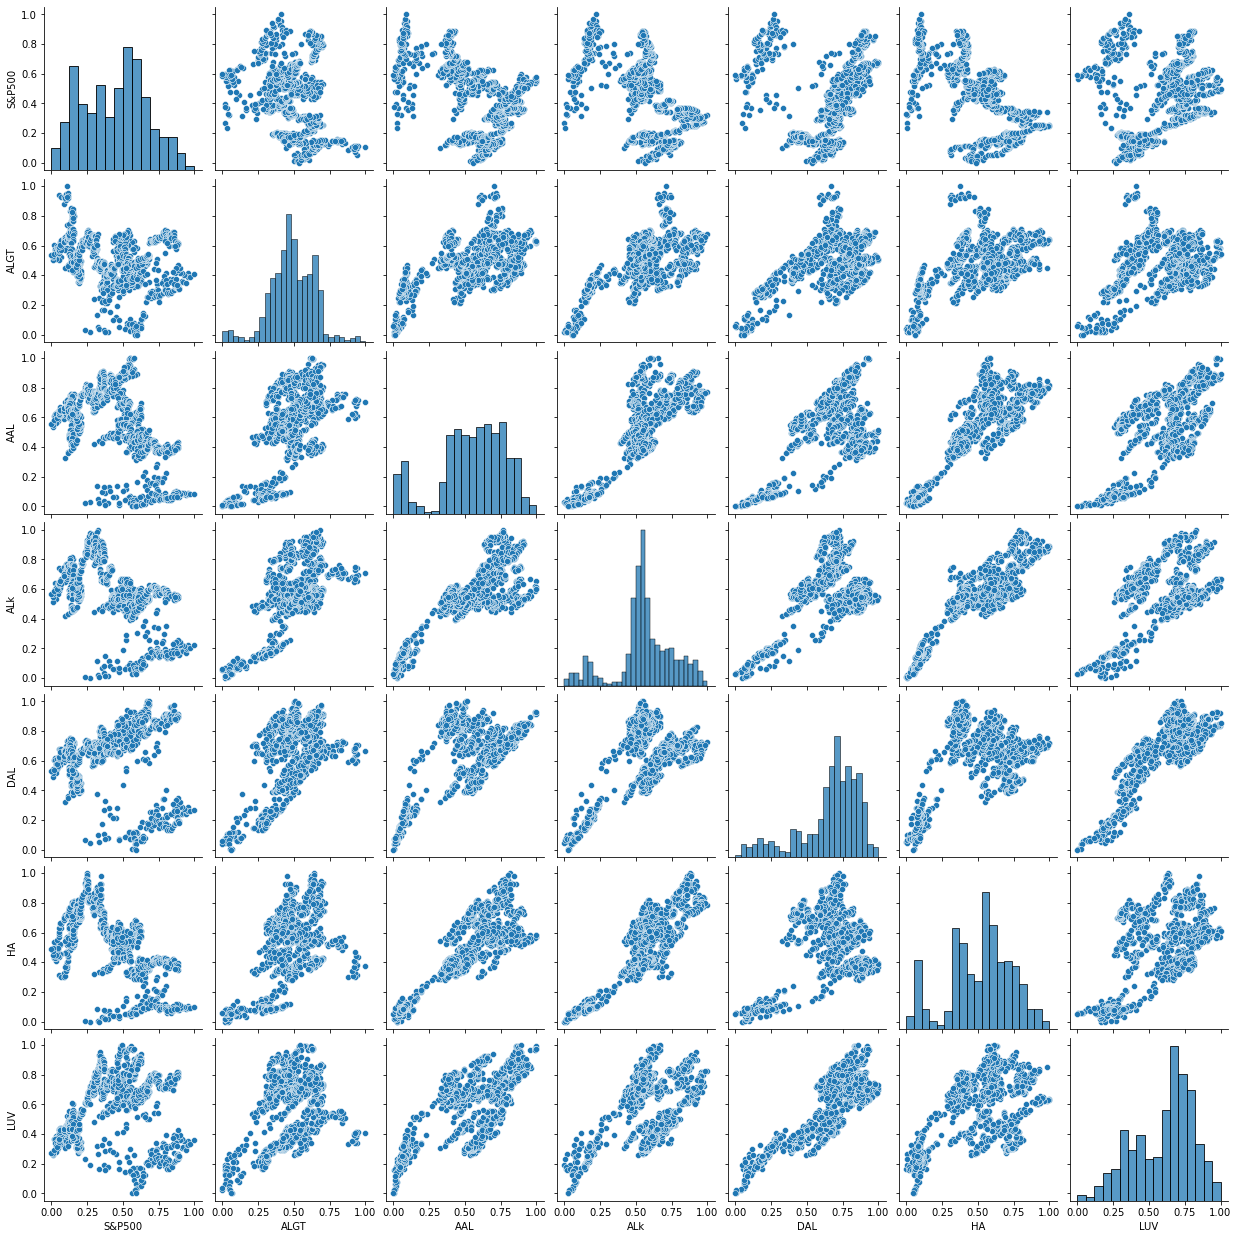

In [30]:
sns.pairplot(Aviation_set)
plt.ioff()

# Insights:
* S&P500 is not co-related to Aviation Sector.
* Market took a massive hit in 2020 due to corona pandemic which resulted in a bear market.
* Even though the market recovered but the Aviation Sector underperformed the market.
* Well within the Aviation Sector only 3 stocks i.e. Allegiant Travel Company, Delta Airlines, Southwest Airlines.
* As we can see in the pairplot Allegiant Travel Company has some positive coorelation with Delta Airlines.
* Also we can see there is some positive coorelation of Delta Airlines with Southwest Airlines.

###  Finance Sector

In [31]:
# Finance Stocks

Finance_Stocks=stocks[['S&P500','BCS','CS','DB','GS','MS','WFC']]

Finance_Stocks.head()

,S&P500,BCS,CS,DB,GS,MS,WFC
Date,,,,,,,
2015-10-01,0.054083,0.933166,0.903059,0.832608,0.296583,0.263568,0.666129
2015-10-02,0.069804,0.964912,0.931571,0.857143,0.303735,0.261687,0.661982
2015-10-05,0.090178,0.982456,0.958528,0.899090,0.330395,0.284793,0.688479
2015-10-06,0.086108,0.978279,0.969933,0.907004,0.327650,0.286674,0.679723
2015-10-07,0.095190,0.993317,0.966822,0.922438,0.341449,0.301988,0.683410


<img src = "Screenshots\Finance Sector.png">

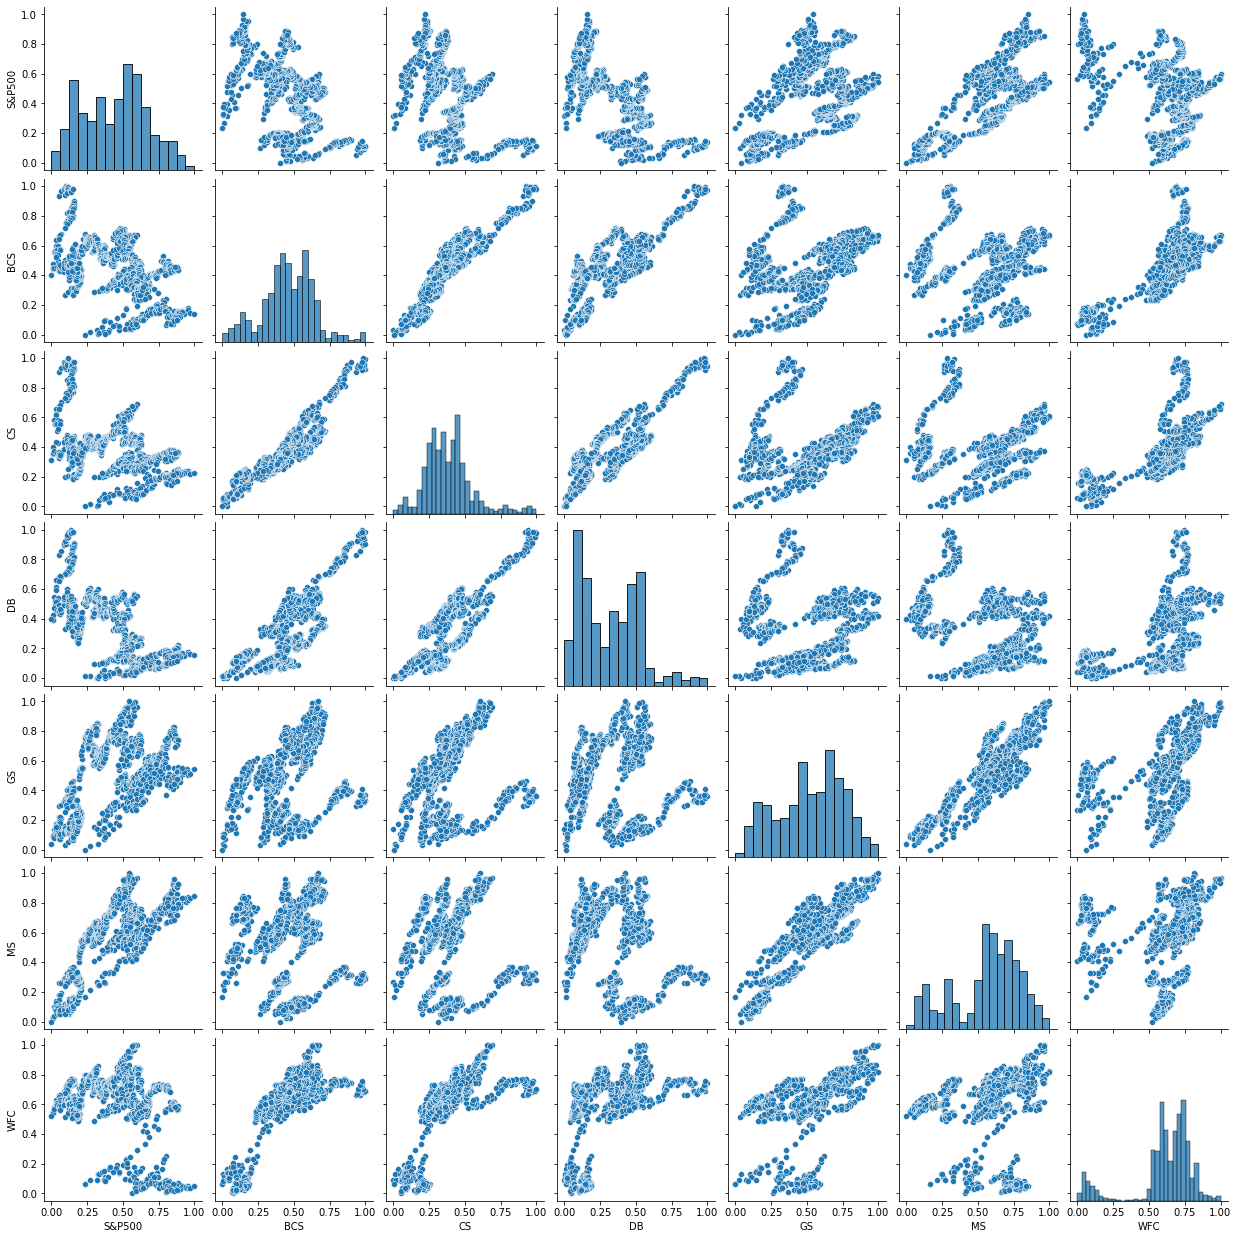

In [32]:
sns.pairplot(Finance_Stocks)
plt.ioff()

# Insights:
* S&P500 is positively co-related with Finance Sector.
* Althought market took a massive hit in 2020 due to corona pandemic Morgan Stanley and Goldman Sachs were able to recover back as well as out performed the sector but still majority of stocks have been hit.
* In the pairplot we can see that Goldman Sachs & Morgan Stanley are highly correlated when compared to others stocks.

In [33]:
# Pharma Stocks
Pharma_Stocks = stocks[['S&P500','BHC','JNJ','MRK','PFE','RHHBY','UNH']]

Pharma_Stocks.head()

,S&P500,BHC,JNJ,MRK,PFE,RHHBY,UNH
Date,,,,,,,
2015-10-01,0.054083,0.984351,0.000000,0.017952,0.188839,0.333985,0.034410
2015-10-02,0.069804,1.000000,0.012191,0.035673,0.258737,0.338875,0.044761
2015-10-05,0.090178,0.891491,0.025505,0.060759,0.281285,0.344743,0.048585
2015-10-06,0.086108,0.906104,0.004010,0.027848,0.242390,0.349144,0.031799
2015-10-07,0.095190,0.928140,0.029034,0.054315,0.270575,0.301222,0.033571


<img src = "Screenshots\Health and Pharma Sector.png">

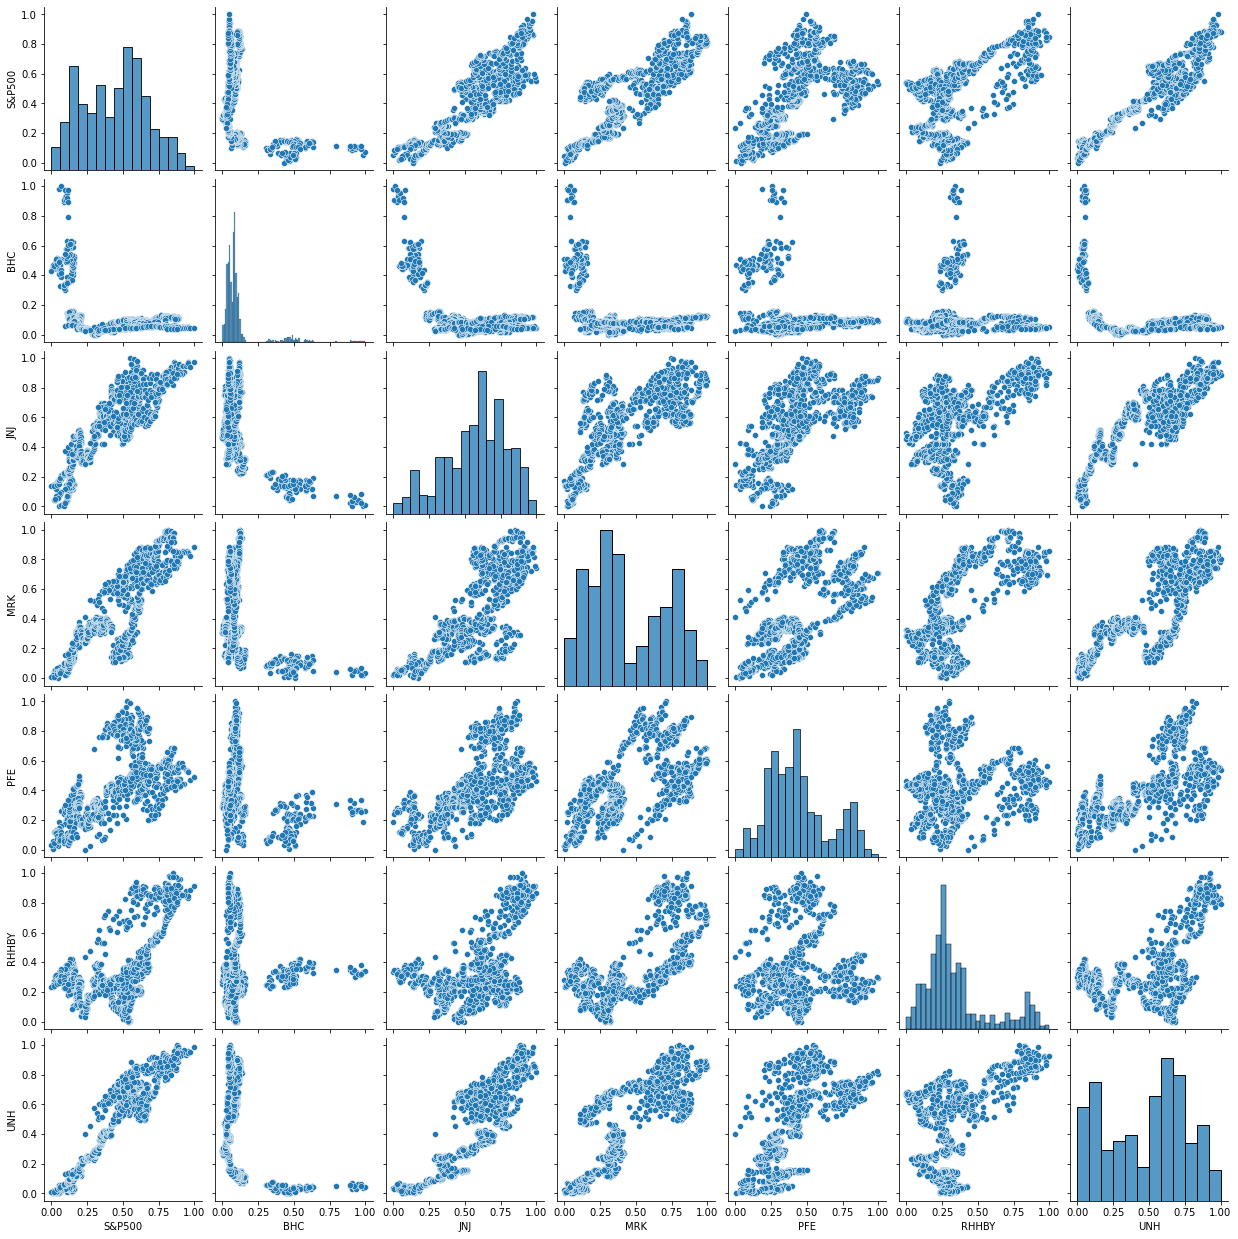

In [34]:
sns.pairplot(Pharma_Stocks)
plt.ioff()

# Insights:
* S&P500 is positively co-related with Health and Pharma Sector(JNJ, MRK, UNH).
* During the pandemic health and pharma and technology sector showed rapid growth after the market crash in comparison to other industries.
* From past 5 years we can see that Bausch Health Companies inc has not seen any growth.
* Overall the health and pharma sector is strong compared to S&P500. 

In [35]:
# Technology Stocks
Technology_Stocks = stocks[['S&P500','AAPL','AMZN','FB','GOOG','IBM','MSFT']]
Technology_Stocks.tail()

,S&P500,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,
2020-09-24,0.809192,0.767373,0.832209,0.744647,0.731430,0.267493,0.847840
2020-09-25,0.838802,0.803755,0.856915,0.769487,0.746354,0.277357,0.872594
2020-09-28,0.869137,0.827770,0.882796,0.778879,0.763865,0.309245,0.881255
2020-09-29,0.859929,0.819974,0.873230,0.802216,0.768172,0.300184,0.869600
2020-09-30,0.875645,0.835387,0.874493,0.802733,0.768413,0.308557,0.886014


<img src = "Screenshots\Tech Sector.png">

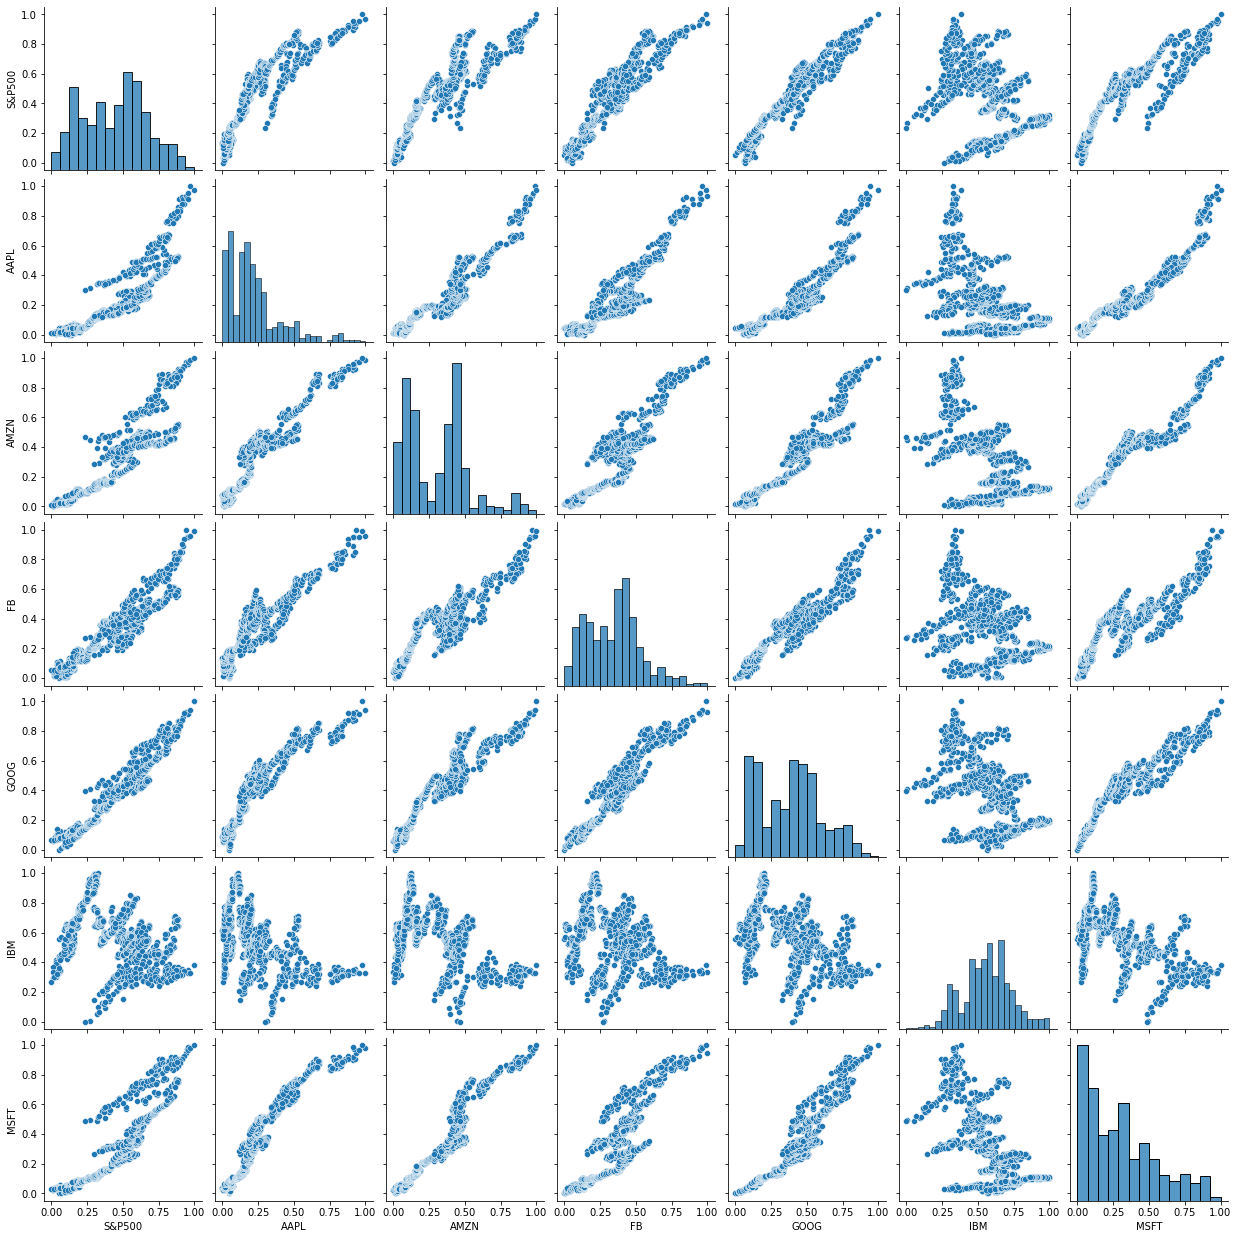

In [36]:
sns.pairplot(Technology_Stocks)
plt.ioff()

# Insights:
* S&P500 is strongly co-related with Technology Sector(AMZN, FB, MSFT, GOOG, AAPL).
* When compared to other sectors during the pandemic Tech sector was one of few sectors to bounce back sharply.
* Except for IBM all the other stocks are out performing the market.
* Also all the stocks except for IBM are strongly co-related with each other.

# Key Metrics 

## DAILY RETURNS

* For calculating the daily returns we will use some formulas and Pandas built in function which is known as pct_change.
* Using this we will be able to calculate the simple returns for each day and each stock.

In [37]:
# Checking the head of the Original Stocks
original_stocks.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-01,1146.239990,9.29,43.230000,12.4475,12.01,5.96,12.94,17.603687,42.226563,52.595421,147.699997,25.020000,25.559999,25.750000,61.750000,36.599998,17.180000,17.389999,35.430000,10.090000,153.710007,261.828613,135.639999,24.379999,0.0
2010-10-04,1137.030029,9.12,41.590000,12.1425,11.51,5.75,12.82,17.502304,41.914063,51.755726,146.570007,24.709999,25.379999,25.870001,61.669998,36.520000,16.900000,17.275000,34.540001,9.951428,155.389999,260.199707,135.250000,23.910000,0.0
2010-10-05,1160.750000,9.23,42.099998,12.2150,11.83,5.85,13.02,18.156683,43.154297,53.950382,149.570007,25.469999,26.250000,26.299999,62.799999,37.020000,17.230000,17.799999,35.070000,10.319285,160.869995,268.110046,137.660004,24.350000,0.0
2010-10-06,1159.969971,9.23,41.950001,12.1875,11.78,5.97,12.94,17.944700,43.437500,54.608780,150.839996,25.379999,26.299999,26.690001,63.209999,37.009998,17.260000,17.975000,33.950001,10.328215,155.399994,266.177307,137.839996,24.430000,0.0
2010-10-07,1158.060059,9.24,41.700001,11.6250,11.77,6.15,12.88,17.253456,43.671875,54.036259,151.110001,25.070000,26.000000,26.600000,63.220001,36.709999,17.379999,17.930000,34.340000,10.329286,156.270004,264.015411,138.720001,24.530001,0.0


In [38]:
# assigning the dataset to daily_returns
daily_return = original_stocks.copy()

In [39]:
# Now we will be taking the data of the last 5 years and do the cumulative daily returs
daily_return = daily_return['10-01-2015':]

daily_return.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-01,1923.819946,39.200001,217.979996,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,176.020004,31.500000,51.439999,179.600006,93.169998,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,611.289978,143.589996,44.610001,90.949997
2015-10-02,1951.359985,38.630001,215.589996,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,177.009995,31.430000,51.259998,182.320007,93.930000,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,626.909973,144.580002,45.570000,92.070000
2015-10-05,1987.050049,40.189999,216.059998,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,180.699997,32.290001,52.410000,163.460007,94.760002,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,641.469971,149.039993,46.630001,94.010002
2015-10-06,1979.920044,38.130001,208.600006,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,180.320007,32.360001,52.029999,166.000000,93.419998,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,645.440002,148.779999,46.750000,92.800003
2015-10-07,1995.829956,39.310001,213.839996,75.970001,45.990002,24.559999,38.709999,15.73,25.320000,28.790001,182.229996,32.930000,52.189999,169.830002,94.980003,50.950001,33.290001,32.549999,116.430000,27.695000,541.940002,642.359985,150.089996,46.799999,92.400002


In [40]:
# Percentage change between the current and a prior element
for i in list(daily_return.columns[:]):
    daily_return[i]=daily_return[i].pct_change(1)  

In [41]:
# Lets Calculate the cumulative daily returns

df_cum_daily_return = (1 + daily_return).cumprod() - 1

df_cum_daily_return.tail()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.687575,-0.699745,-0.442609,-0.555029,-0.361154,-0.498585,-0.040354,-0.683544,-0.600664,-0.694193,0.108454,0.479683,-0.546656,-0.915256,0.552753,0.684221,0.123116,0.345575,1.509733,2.950356,4.799259,1.336518,-0.177589,3.554808,1.743595
2020-09-25,0.714537,-0.686480,-0.432241,-0.542565,-0.344197,-0.482410,-0.034106,-0.686875,-0.606476,-0.698341,0.107545,0.493333,-0.540435,-0.914811,0.563379,0.679765,0.132224,0.349187,1.594117,3.098558,4.943943,1.363788,-0.171600,3.658597,1.801759
2020-09-28,0.742159,-0.674490,-0.416873,-0.532095,-0.309844,-0.458957,-0.004426,-0.667555,-0.589041,-0.682127,0.130951,0.535873,-0.536936,-0.914978,0.578942,0.676322,0.142902,0.327815,1.600377,3.196386,5.095503,1.395786,-0.152239,3.694911,1.823749
2020-09-29,0.733775,-0.687500,-0.444490,-0.542939,-0.325919,-0.479984,-0.020828,-0.669554,-0.591947,-0.688160,0.117998,0.499683,-0.547823,-0.917149,0.578405,0.658902,0.135992,0.305539,1.608267,3.164628,5.039484,1.403655,-0.157741,3.646043,1.878395
2020-09-30,0.748085,-0.686480,-0.450408,-0.543438,-0.326580,-0.478771,-0.023692,-0.666223,-0.586135,-0.683258,0.141745,0.534921,-0.542963,-0.913474,0.597939,0.680170,0.152638,0.288682,1.673613,3.227414,5.046878,1.404096,-0.152657,3.714862,1.879604


In [42]:
# As we have calculated returns the first row for Returns and CumReturns will be null 
# We will be Deleting the null rows as they are not relevant for our further calculations

daily_return.dropna(axis = 0, inplace = True)
df_cum_daily_return.dropna(axis = 0, inplace = True)

In [43]:
# Checking the head
daily_return.head()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-02,0.014315,-0.014541,-0.010964,-0.012090,-0.011892,-0.018196,-0.000781,0.025316,0.022831,0.023379,0.005624,-0.002222,-0.003499,0.015145,0.008157,0.015597,0.038945,0.003010,0.019038,0.007301,0.022699,0.025553,0.006895,0.021520,0.012314
2015-10-05,0.018290,0.040383,0.002180,0.020818,0.046579,0.050247,0.023971,0.013645,0.021104,0.039057,0.020846,0.027362,0.022435,-0.103444,0.008836,0.021739,0.012092,0.003601,0.006901,0.003624,0.020919,0.023225,0.030848,0.023261,0.021071
2015-10-06,-0.003588,-0.051256,-0.034527,-0.078853,-0.039821,-0.049020,-0.033079,-0.003205,0.008744,0.007092,-0.002103,0.002168,-0.007251,0.015539,-0.014141,-0.027913,-0.020609,0.002691,-0.030088,0.004784,-0.011404,0.006189,-0.001744,0.002573,-0.012871
2015-10-07,0.008036,0.030947,0.025120,0.019321,0.019960,0.012783,0.018684,0.011576,-0.002364,0.013732,0.010592,0.017614,0.003075,0.023072,0.016699,0.023092,0.015249,-0.029228,0.003274,-0.004761,0.008298,-0.004772,0.008805,0.001069,-0.004310
2015-10-08,0.008818,0.010939,-0.005518,-0.002764,-0.000652,0.062296,0.001292,0.005086,-0.031201,-0.013894,-0.006366,0.001822,0.006706,0.007890,0.001053,0.001374,-0.006008,0.021505,-0.003006,-0.011554,-0.016201,-0.004982,0.014591,0.013889,0.000758


In [44]:
#Checking the tail of the new df
df_cum_daily_return.tail()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-24,0.687575,-0.699745,-0.442609,-0.555029,-0.361154,-0.498585,-0.040354,-0.683544,-0.600664,-0.694193,0.108454,0.479683,-0.546656,-0.915256,0.552753,0.684221,0.123116,0.345575,1.509733,2.950356,4.799259,1.336518,-0.177589,3.554808,1.743595
2020-09-25,0.714537,-0.686480,-0.432241,-0.542565,-0.344197,-0.482410,-0.034106,-0.686875,-0.606476,-0.698341,0.107545,0.493333,-0.540435,-0.914811,0.563379,0.679765,0.132224,0.349187,1.594117,3.098558,4.943943,1.363788,-0.171600,3.658597,1.801759
2020-09-28,0.742159,-0.674490,-0.416873,-0.532095,-0.309844,-0.458957,-0.004426,-0.667555,-0.589041,-0.682127,0.130951,0.535873,-0.536936,-0.914978,0.578942,0.676322,0.142902,0.327815,1.600377,3.196386,5.095503,1.395786,-0.152239,3.694911,1.823749
2020-09-29,0.733775,-0.687500,-0.444490,-0.542939,-0.325919,-0.479984,-0.020828,-0.669554,-0.591947,-0.688160,0.117998,0.499683,-0.547823,-0.917149,0.578405,0.658902,0.135992,0.305539,1.608267,3.164628,5.039484,1.403655,-0.157741,3.646043,1.878395
2020-09-30,0.748085,-0.686480,-0.450408,-0.543438,-0.326580,-0.478771,-0.023692,-0.666223,-0.586135,-0.683258,0.141745,0.534921,-0.542963,-0.913474,0.597939,0.680170,0.152638,0.288682,1.673613,3.227414,5.046878,1.404096,-0.152657,3.714862,1.879604


#### Last record of the dataframe multiplied by 100 is giving us the percentage change of the stock prices for our entire period

In [45]:
#first we will select the last row and assigning it to a new data frame
Cum_daily_return = df_cum_daily_return.iloc[:, :].tail(1)

# rounding off the values by mulitplying with 100
Cum_daily_return = Cum_daily_return * 100

# lets check the dataframe
Cum_daily_return

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-30,74.808459,-68.64796,-45.040827,-54.343762,-32.658005,-47.877072,-2.369175,-66.622252,-58.613533,-68.325792,14.174524,53.492057,-54.296267,-91.347439,59.793934,68.017012,15.263822,28.868151,167.361278,322.741369,504.68777,140.40963,-15.265686,371.486208,187.960421


In [46]:
# reseting the index
Cum_daily_return = Cum_daily_return.reset_index()

# transposing the dataframe 
Cum_daily_return = Cum_daily_return.transpose()

# Removing the date row & selecting only the stocks as per our requirement
Cum_daily_return = Cum_daily_return[1:]

# Renaming the column from Zero to Cumulative Returns
Cum_daily_return = Cum_daily_return.rename(columns = {0: 'Cumulative Returns'}, inplace = False)

# Sorting the values by descending order
Cum_daily_return = Cum_daily_return.sort_values('Cumulative Returns', ascending = False)

# checking the dataframe
Cum_daily_return

,Cumulative Returns
AMZN,504.68777
MSFT,371.486208
AAPL,322.741369
FB,187.960421
UNH,167.361278
GOOG,140.40963
S&P500,74.808459
MRK,68.017012
JNJ,59.793934
MS,53.492057


In [47]:
# changing the datatype to float from object so that we can round it off
Cum_daily_return['Cumulative Returns'] = Cum_daily_return['Cumulative Returns'].astype(float, errors = 'raise')

# round off the values by 2 decimal points for easy refernce
Cum_daily_return = round(Cum_daily_return['Cumulative Returns'], 2)

# checking the dataframe
Cum_daily_return

AMZN      504.69
MSFT      371.49
AAPL      322.74
FB        187.96
UNH       167.36
GOOG      140.41
S&P500     74.81
MRK        68.02
JNJ        59.79
MS         53.49
RHHBY      28.87
PFE        15.26
GS         14.17
LUV        -2.37
IBM       -15.27
DAL       -32.66
ALGT      -45.04
HA        -47.88
WFC       -54.30
ALk       -54.34
CS        -58.61
BCS       -66.62
DB        -68.33
AAL       -68.65
BHC       -91.35
Name: Cumulative Returns, dtype: float64

#### When calculated the cummulative daily returns we found out that Amazon, Microsoft and Apple are the highest return stocks followed by Facebook, Google and UnitedHealthGroup Inc

## Calculation of Sharp Ratio, Annual Risk & Annual Returns

In [48]:
#Checking the stats of the data:

daily_return.describe()

,S&P500,AAL,ALGT,ALk,DAL,HA,LUV,BCS,CS,DB,GS,MS,WFC,BHC,JNJ,MRK,PFE,RHHBY,UNH,AAPL,AMZN,GOOG,IBM,MSFT,FB
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.000517,-0.000336,-0.000047,-0.000256,0.000042,0.000034,0.000245,-0.000548,-0.000437,-0.000529,0.000303,0.000578,-0.000414,-0.000897,0.000451,0.000511,0.000209,0.000293,0.000941,0.001322,0.001611,0.000834,-0.000002,0.001387,0.001050
std,0.012080,0.034725,0.029101,0.026907,0.026478,0.033132,0.022913,0.025119,0.022842,0.027743,0.019899,0.021810,0.020349,0.044551,0.012459,0.014067,0.013826,0.013514,0.017810,0.018729,0.018969,0.016520,0.016086,0.017539,0.020354
min,-0.119841,-0.252246,-0.283300,-0.232385,-0.259924,-0.264971,-0.151094,-0.218519,-0.182598,-0.174888,-0.127053,-0.156000,-0.158676,-0.514629,-0.100379,-0.088990,-0.077346,-0.089609,-0.172769,-0.128647,-0.079221,-0.111008,-0.128507,-0.147390,-0.189609
25%,-0.002938,-0.013623,-0.011305,-0.010721,-0.009714,-0.014908,-0.009222,-0.010787,-0.010442,-0.014976,-0.008386,-0.009023,-0.007917,-0.019678,-0.004277,-0.006240,-0.005856,-0.006237,-0.006644,-0.006179,-0.006716,-0.005788,-0.006498,-0.005893,-0.007223
50%,0.000682,-0.000480,-0.000363,0.000206,0.000783,0.000342,0.000618,0.000000,0.000000,-0.001051,0.000299,0.000445,-0.000362,-0.000501,0.000493,0.000245,0.000115,0.000229,0.000809,0.000951,0.001636,0.000973,0.000483,0.001225,0.001193
75%,0.005213,0.013233,0.011630,0.010619,0.009781,0.015078,0.009990,0.010215,0.010416,0.013872,0.009704,0.010451,0.007589,0.018022,0.005921,0.007616,0.006372,0.006919,0.008161,0.009911,0.010765,0.008785,0.006879,0.009161,0.010880
max,0.093828,0.410970,0.292428,0.203079,0.210171,0.245837,0.144441,0.151042,0.163447,0.140244,0.175803,0.197700,0.145347,0.337444,0.079977,0.104080,0.089607,0.130118,0.127989,0.119808,0.132164,0.104485,0.113011,0.142169,0.155214


In [49]:
#Lets calculate mean and standard deviation of all the stocks:
df_daily_return = daily_return.describe()[1:8].T.sort_values('mean', ascending = False) # sorting the values by mean

# dropping the unnecessary columns:
df = df_daily_return.drop(['25%', '50%', '75%'], axis = 1)

# Renaming the columns names 
df = df.rename(columns = {'mean': 'Avg Daily Returns', 'std':'Risk', "min": "Min", "max" : "Max" }, inplace = False)

# lets check the dataframe
df

,Avg Daily Returns,Risk,Min,Max
AMZN,0.001611,0.018969,-0.079221,0.132164
MSFT,0.001387,0.017539,-0.147390,0.142169
AAPL,0.001322,0.018729,-0.128647,0.119808
FB,0.001050,0.020354,-0.189609,0.155214
UNH,0.000941,0.017810,-0.172769,0.127989
GOOG,0.000834,0.016520,-0.111008,0.104485
MS,0.000578,0.021810,-0.156000,0.197700
S&P500,0.000517,0.012080,-0.119841,0.093828
MRK,0.000511,0.014067,-0.088990,0.104080
JNJ,0.000451,0.012459,-0.100379,0.079977


In [50]:
# Lets calculate Annualized Returns

# As per the industry practice here we take 252 days as the number of working days of a stock market 
df["Annualized_Returns"] = df["Avg Daily Returns"]*252

#Lets calculate Annualized risk

df["Annualized_Risk"] = np.sqrt(252) * df["Risk"]

# Lets Calculate the Sharpe Ratio

# here we are considering the risk free rate as 0.75%
df["Sharpe_Ratio"] = ((df["Annualized_Returns"] - 0.0075) / df["Annualized_Risk"]) / 100 #we have divided by 100 to cancel the roundoff 

# lets see the dataframe
df

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AMZN,0.001611,0.018969,-0.079221,0.132164,0.405855,0.301117,0.013229
MSFT,0.001387,0.017539,-0.147390,0.142169,0.349535,0.278430,0.012284
AAPL,0.001322,0.018729,-0.128647,0.119808,0.333182,0.297317,0.010954
FB,0.001050,0.020354,-0.189609,0.155214,0.264524,0.323113,0.007955
UNH,0.000941,0.017810,-0.172769,0.127989,0.237197,0.282731,0.008124
GOOG,0.000834,0.016520,-0.111008,0.104485,0.210194,0.262253,0.007729
MS,0.000578,0.021810,-0.156000,0.197700,0.145536,0.346215,0.003987
S&P500,0.000517,0.012080,-0.119841,0.093828,0.130407,0.191765,0.006409
MRK,0.000511,0.014067,-0.088990,0.104080,0.128832,0.223306,0.005433
JNJ,0.000451,0.012459,-0.100379,0.079977,0.113527,0.197781,0.005361


In [51]:
# Converting the values in percentage by multiplying by 100:
df = df*100

# round off the values by 2 decimal points:
df = round(df, 2)

# lets check the dataframe
df

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AMZN,0.16,1.90,-7.92,13.22,40.59,30.11,1.32
MSFT,0.14,1.75,-14.74,14.22,34.95,27.84,1.23
AAPL,0.13,1.87,-12.86,11.98,33.32,29.73,1.10
FB,0.10,2.04,-18.96,15.52,26.45,32.31,0.80
UNH,0.09,1.78,-17.28,12.80,23.72,28.27,0.81
GOOG,0.08,1.65,-11.10,10.45,21.02,26.23,0.77
MS,0.06,2.18,-15.60,19.77,14.55,34.62,0.40
S&P500,0.05,1.21,-11.98,9.38,13.04,19.18,0.64
MRK,0.05,1.41,-8.90,10.41,12.88,22.33,0.54
JNJ,0.05,1.25,-10.04,8.00,11.35,19.78,0.54


In [52]:
#merging the dataframe with cummilative daily returns dataframe:

df_final = pd.concat([df, Cum_daily_return], axis=1)

df_final

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio,Cumulative Returns
AMZN,0.16,1.90,-7.92,13.22,40.59,30.11,1.32,504.69
MSFT,0.14,1.75,-14.74,14.22,34.95,27.84,1.23,371.49
AAPL,0.13,1.87,-12.86,11.98,33.32,29.73,1.10,322.74
FB,0.10,2.04,-18.96,15.52,26.45,32.31,0.80,187.96
UNH,0.09,1.78,-17.28,12.80,23.72,28.27,0.81,167.36
GOOG,0.08,1.65,-11.10,10.45,21.02,26.23,0.77,140.41
MS,0.06,2.18,-15.60,19.77,14.55,34.62,0.40,53.49
S&P500,0.05,1.21,-11.98,9.38,13.04,19.18,0.64,74.81
MRK,0.05,1.41,-8.90,10.41,12.88,22.33,0.54,68.02
JNJ,0.05,1.25,-10.04,8.00,11.35,19.78,0.54,59.79


### Insights:

#### At the end of 5 years we can see that the top 8 performing stocks based on Annual Returns:

- AMZN gives 40.59% annual returns
- MSFT gives 34.95% annual returns
- AAPL gives 33.32% annual returns
- FB gives 26.45% annual returns
- UNH gives 23.72% annual returns
- GOOG gives 21.02% annual returns
- MS gives 14.55% annual returns
- MRK gives 12.88% annual returns

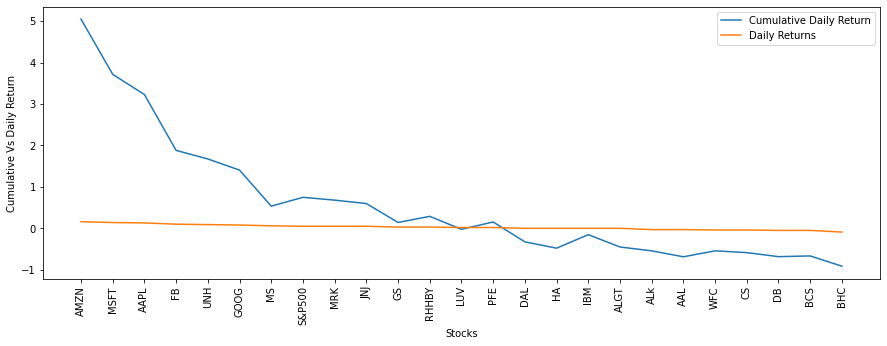

In [53]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Return")
sns.lineplot(data=df_final['Avg Daily Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Vs Daily Return")

plt.show()

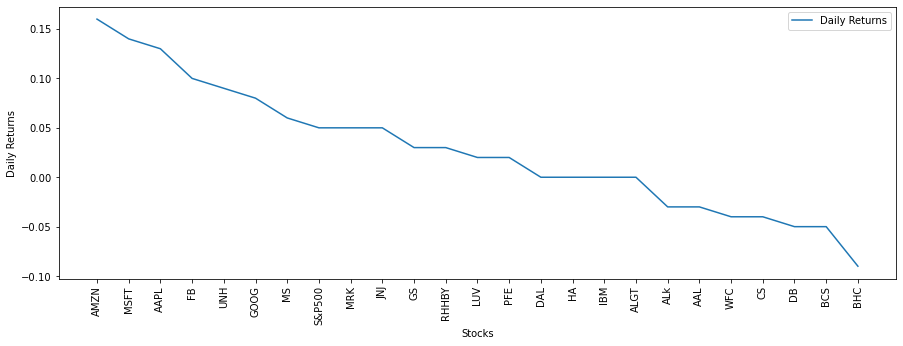

In [54]:
# Line chart showing daily returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Avg Daily Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Daily Returns")

plt.show()

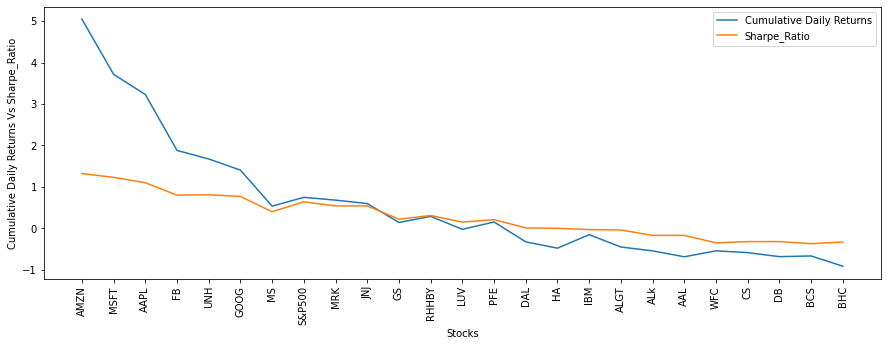

In [55]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Sharpe_Ratio'], label="Sharpe_Ratio")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Daily Returns Vs Sharpe_Ratio")

plt.show()

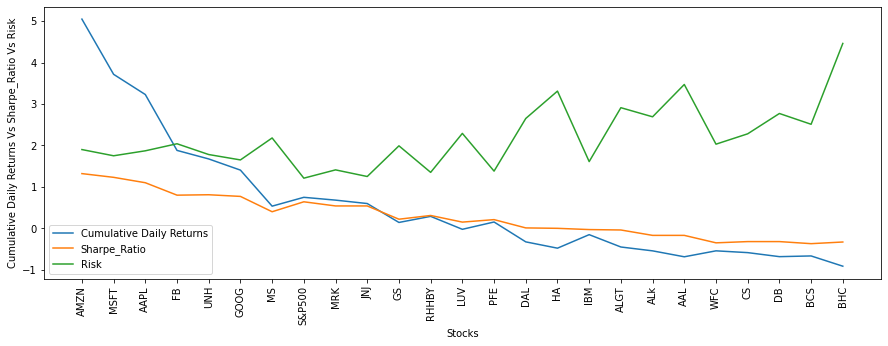

In [56]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Sharpe_Ratio'], label="Sharpe_Ratio")
sns.lineplot(data=df_final['Risk'], label="Risk")


# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Daily Returns Vs Sharpe_Ratio Vs Risk")

plt.show()

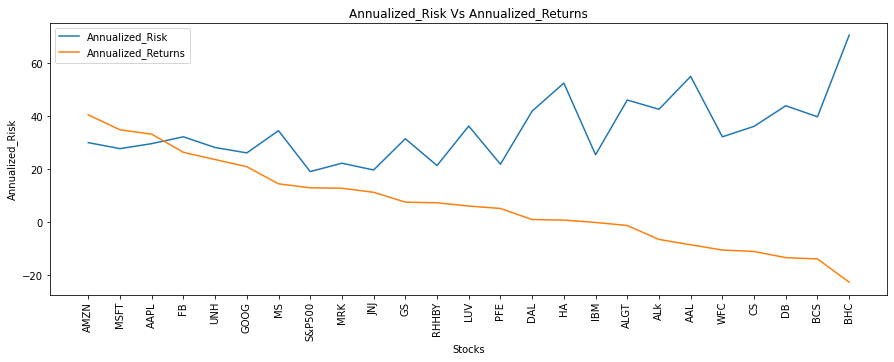

In [57]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Annualized_Risk'], label="Annualized_Risk")
sns.lineplot(data=df_final['Annualized_Returns'], label="Annualized_Returns")


# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.title("Annualized_Risk Vs Annualized_Returns")

plt.show()

### Portfolio Analysis:

#### Mr. Patrick Jyengar Portfolio

- Mr. Patrick Jyengar wants to double his investment in the span on 5 years. He wants to invest in low risk stocks which would fetch him decent returns.
- As per his profile Low risk stocks like JNJ,RHHBY and GOOG is suitable to invest on. But overall returns with these three stocks wouldn't reach the target what Mr.Patrick is investing for. So one portion of his wealth can be invested on MSFT to gain the desired returns.
- Lets calculate the Risk and Returns associated with the above mentioned portfolio.

In [58]:
# Initial weight for each stock in order
stocks_data = ['MSFT', 'JNJ', 'RHHBY' ,'GOOG']

initial_weight_stocks_df = np.array([0.25, 0.25, 0.25, 0.25])

In [59]:
# Lets create a dataset for selected stocks
stocks = original_stocks['10-01-2015':]
portfolio = stocks.copy()
portfolio = portfolio[stocks_data]
portfolio.tail()

,MSFT,JNJ,RHHBY,GOOG
Date,,,,
2020-09-24,203.190002,144.669998,44.700001,1428.290039
2020-09-25,207.820007,145.660004,44.820000,1444.959961
2020-09-28,209.440002,147.110001,44.110001,1464.520020
2020-09-29,207.259995,147.059998,43.369999,1469.329956
2020-09-30,210.330002,148.880005,42.810001,1469.599976


### Stock Return on Daily Basis:

In [60]:
# Calculating the daily percentage change:

stocks_returns_daily = portfolio.pct_change()
stocks_returns_daily.head()

,MSFT,JNJ,RHHBY,GOOG
Date,,,,
2015-10-01,NaN,NaN,NaN,NaN
2015-10-02,0.021520,0.008157,0.003010,0.025553
2015-10-05,0.023261,0.008836,0.003601,0.023225
2015-10-06,0.002573,-0.014141,0.002691,0.006189
2015-10-07,0.001069,0.016699,-0.029228,-0.004772


### Average daily Return of Stock:

In [61]:
# let's calculate the avg daily returns:

avg_stocks_daily_returns = stocks_returns_daily.mean()
avg_stocks_daily_returns

MSFT     0.001387
JNJ      0.000451
RHHBY    0.000293
GOOG     0.000834
dtype: float64

### Risk of Stocks in Portfolio:

In [62]:
#Calculating Risk of the stocks:

stock_risk= stocks_returns_daily.std()
stock_risk

MSFT     0.017539
JNJ      0.012459
RHHBY    0.013514
GOOG     0.016520
dtype: float64

### Daily return from the portfolio:

In [63]:
# Daily return from the portfolio

stocks_returns_daily['portfolio_daily_return'] = stocks_returns_daily.dot(initial_weight_stocks_df)
stocks_returns_daily.head()

,MSFT,JNJ,RHHBY,GOOG,portfolio_daily_return
Date,,,,,
2015-10-01,NaN,NaN,NaN,NaN,NaN
2015-10-02,0.021520,0.008157,0.003010,0.025553,0.014560
2015-10-05,0.023261,0.008836,0.003601,0.023225,0.014731
2015-10-06,0.002573,-0.014141,0.002691,0.006189,-0.000672
2015-10-07,0.001069,0.016699,-0.029228,-0.004772,-0.004058


### Total Portfolio Return:

In [64]:
#Let's calculate the total returns of the portfolio:

allocated_stocks_daily_return = (initial_weight_stocks_df * avg_stocks_daily_returns)

portfolio_return = np.sum(allocated_stocks_daily_return)
portfolio_return*100

0.07410905572706407

#### The Average Daily Returns of Portfolio is 0.07%

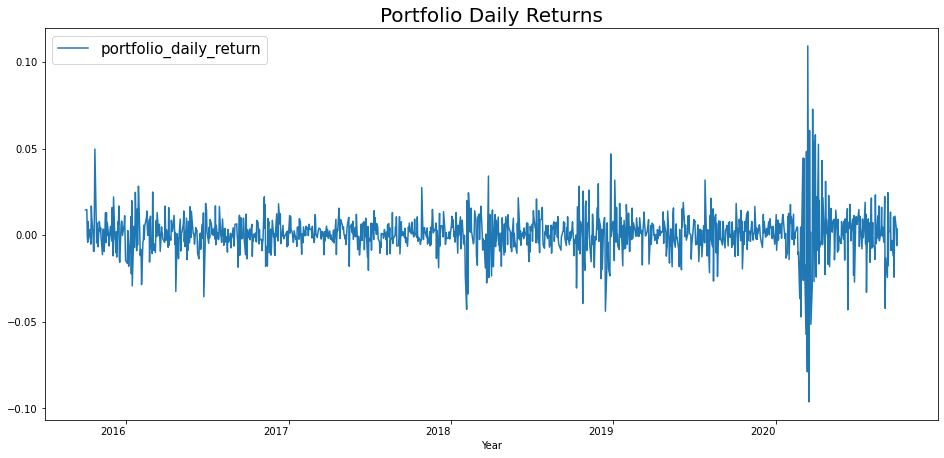

In [65]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
stocks_returns_daily['portfolio_daily_return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

### Cummulative Return from the Portfolio:

In [66]:
# Cumulative return from the portfolio

daily_cumulative_return = (1+stocks_returns_daily).cumprod()
daily_cumulative_return.tail(5)

,MSFT,JNJ,RHHBY,GOOG,portfolio_daily_return
Date,,,,,
2020-09-24,4.554808,1.552753,1.345575,2.336518,2.286682
2020-09-25,4.658597,1.563379,1.349187,2.363788,2.311827
2020-09-28,4.694911,1.578942,1.327815,2.395786,2.320754
2020-09-29,4.646043,1.578405,1.305539,2.403655,2.306690
2020-09-30,4.714862,1.597939,1.288682,2.404096,2.315028


#### It can be seen that this suggest that the portfolio has given cummulative return of 2.31 % in the given period.

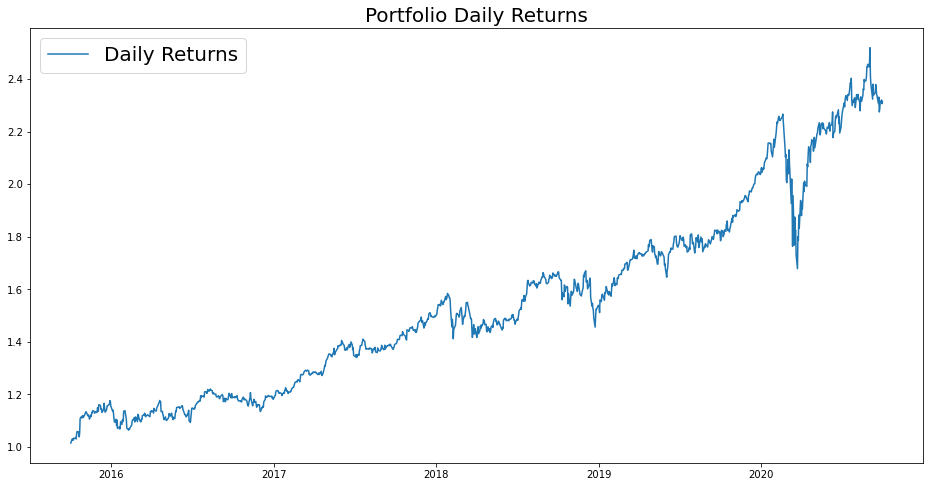

In [67]:
# Lets Plot the graph

plt.figure(figsize=(16,8))
plt.plot(daily_cumulative_return['portfolio_daily_return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

### Portfolio Risk:

For the portfolio standard deviation formula, we need three elements:

- Portfolio weighted array
- Portfolio covariance matrix
- Transpose of portfolio weight array


The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by **multiplying with 252 (the trading days in a year)**.

In [68]:
# Covariance matrix for the portfolio
# Removing the last column (Portfolio_Daily_Return) from our calculation.

covariance_matrix_portfolio_s = stocks_returns_daily.iloc[:,:-1]
covariance_matrix_portfolio_s = (covariance_matrix_portfolio_s.cov())*252

covariance_matrix_portfolio_s

,MSFT,JNJ,RHHBY,GOOG
MSFT,0.077524,0.028277,0.029796,0.057110
JNJ,0.028277,0.039117,0.019560,0.023301
RHHBY,0.029796,0.019560,0.046023,0.023277
GOOG,0.057110,0.023301,0.023277,0.068777


In [69]:
# Applying the matrix operations mentioned in the image above:

portfolio_variance_s = np.dot(initial_weight_stocks_df.T,np.dot(covariance_matrix_portfolio_s, initial_weight_stocks_df))

In [70]:
# Standard deviation (risk of portfolio):

portfolio_risk_s= np.sqrt(portfolio_variance_s)
portfolio_risk_s*100

19.269220959046514

### Sharpe Ratio:

In [71]:
# Assuming that the risk free rate is zero:

Sharpe_Ratio_S = (stocks_returns_daily['portfolio_daily_return'].mean() - daily_return['S&P500'].mean())/ stocks_returns_daily['portfolio_daily_return'].std()
Sharpe_Ratio_S

0.018421120707558806

In [72]:
#Let's Calculate Annualised sharpe ratio:

Annualised_Sharpe_Ratio_S = (252**0.5)*Sharpe_Ratio_S
Annualised_Sharpe_Ratio_S

0.29242622557981673

### Total ROI from the Portfolio:

In [73]:
# calculating the total return on investment:

invested_amount    = 500000
Cummulative_return = daily_cumulative_return['portfolio_daily_return'][-1]
Expected_Return    = round(invested_amount*Cummulative_return,2)
Expected_Earning   = round(Expected_Return-invested_amount,2)
print(f"""Invested Amount : {invested_amount}
         Expected Retunr  : {Expected_Return}
         Expected Earning : {Expected_Earning}""")

Invested Amount : 500000
         Expected Retunr  : 1157514.11
         Expected Earning : 657514.11


#### As Mr.Patrick Jyengar invests 5 Hundred Thousand Dollar in equities. The returns that he would get after 5 years of time period is 1.15 Million Dollar with more than 6 Hundred Thousand dollars of gain.

#### Mr. Peter Jyengar Portfolio

- Mr. Peter Jyengar on the other hand Consistent with his attitude towards risk, he prefers high-return investments. Believes that he can still bounce back in case of any occasional losses. 
- He Wants to invest 1 million dollar from company's cash and cash equivalents in the most high-margin stocks Expects high returns within 5 years for inorganic expansion of his company. 
- As per his profile High risk/High Returns stocks like AMZN, MSFT and AAPL is suitable to invest on. 
- Overall returns with these stocks would fetch him Maximum returns and also cater the Risk.

In [74]:
# Initial weight for each stock in order
stocks_data = ['AMZN', 'MSFT', 'AAPL']

initial_weight_stocks_df = np.array([0.334, 0.334, 0.332])

In [75]:
# Lets create a dataset for selected stocks
stocks = original_stocks['10-01-2015':]
portfolio = stocks.copy()
portfolio = portfolio[stocks_data]
portfolio.tail()

,AMZN,MSFT,AAPL
Date,,,
2020-09-24,3019.790039,203.190002,108.220001
2020-09-25,3095.129883,207.820007,112.279999
2020-09-28,3174.050049,209.440002,114.959999
2020-09-29,3144.879883,207.259995,114.089996
2020-09-30,3148.729980,210.330002,115.809998


### Stock Return on Daily Basis:

In [76]:
# Calculating the daily percentage change:

stocks_returns_daily = portfolio.pct_change()
stocks_returns_daily.head()

,AMZN,MSFT,AAPL
Date,,,
2015-10-01,NaN,NaN,NaN
2015-10-02,0.022699,0.021520,0.007301
2015-10-05,0.020919,0.023261,0.003624
2015-10-06,-0.011404,0.002573,0.004784
2015-10-07,0.008298,0.001069,-0.004761


### Average daily Return of Stock:

In [77]:
# let's calculate the avg daily returns:

avg_stocks_daily_returns = stocks_returns_daily.mean()
avg_stocks_daily_returns

AMZN    0.001611
MSFT    0.001387
AAPL    0.001322
dtype: float64

### Risk of Stocks in Portfolio:

In [78]:
#Calculating Risk of the stocks:

stock_risk= stocks_returns_daily.std()
stock_risk

AMZN    0.018969
MSFT    0.017539
AAPL    0.018729
dtype: float64

### Daily return from the portfolio:

In [79]:
# Daily return from the portfolio

stocks_returns_daily['portfolio_daily_return'] = stocks_returns_daily.dot(initial_weight_stocks_df)
stocks_returns_daily.head()

,AMZN,MSFT,AAPL,portfolio_daily_return
Date,,,,
2015-10-01,NaN,NaN,NaN,NaN
2015-10-02,0.022699,0.021520,0.007301,0.017193
2015-10-05,0.020919,0.023261,0.003624,0.015959
2015-10-06,-0.011404,0.002573,0.004784,-0.001361
2015-10-07,0.008298,0.001069,-0.004761,0.001548


### Total Portfolio Return:

In [80]:
#Let's calculate the total returns of the portfolio:

allocated_stocks_daily_return = (initial_weight_stocks_df * avg_stocks_daily_returns)

portfolio_return = np.sum(allocated_stocks_daily_return)
portfolio_return*100

0.14401448139517312

#### The Average Daily Returns of Portfolio is 0.13%

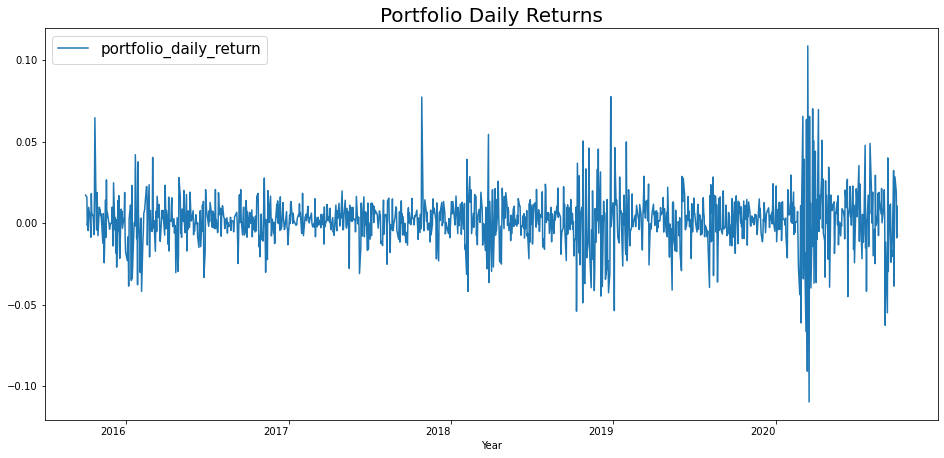

In [81]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
stocks_returns_daily['portfolio_daily_return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

### Cummulative Return from the Portfolio:

In [82]:
# Cumulative return from the portfolio

daily_cumulative_return = (1+stocks_returns_daily).cumprod()
daily_cumulative_return.tail(5)

,AMZN,MSFT,AAPL,portfolio_daily_return
Date,,,,
2020-09-24,5.799259,4.554808,3.950356,4.948047
2020-09-25,5.943943,4.658597,4.098558,5.088566
2020-09-28,6.095503,4.694911,4.196386,5.185475
2020-09-29,6.039484,4.646043,4.164628,5.138502
2020-09-30,6.046878,4.714862,4.227414,5.191744


#### It can be seen that this suggest that the portfolio has given cummulative return of 4.59 % in the given period.

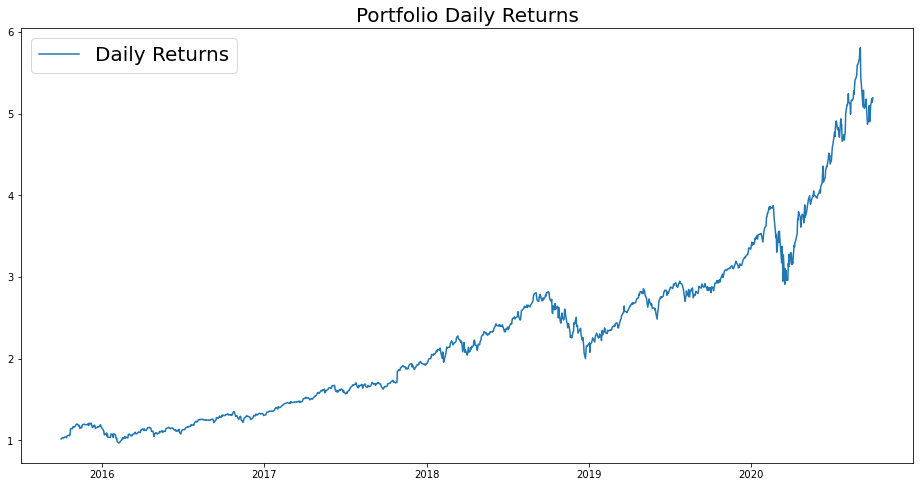

In [83]:
# Lets Plot the graph

plt.figure(figsize=(16,8))
plt.plot(daily_cumulative_return['portfolio_daily_return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

### Portfolio Risk:

For the portfolio standard deviation formula, we need three elements:

- Portfolio weighted array
- Portfolio covariance matrix
- Transpose of portfolio weight array


The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by **multiplying with 252 (the trading days in a year)**.

In [84]:
# Covariance matrix for the portfolio
# Removing the last column (Portfolio_Daily_Return) from our calculation.

covariance_matrix_portfolio_s = stocks_returns_daily.iloc[:,:-1]
covariance_matrix_portfolio_s = (covariance_matrix_portfolio_s.cov())*252

covariance_matrix_portfolio_s

,AMZN,MSFT,AAPL
AMZN,0.090671,0.056626,0.051597
MSFT,0.056626,0.077524,0.058350
AAPL,0.051597,0.058350,0.088398


In [85]:
# Applying the matrix operations mentioned in the image above:

portfolio_variance_s = np.dot(initial_weight_stocks_df.T,np.dot(covariance_matrix_portfolio_s, initial_weight_stocks_df))

In [86]:
# Standard deviation (risk of portfolio):

portfolio_risk_s= np.sqrt(portfolio_variance_s)
portfolio_risk_s*100

25.597709541691284

### Sharpe Ratio:

In [87]:
# Assuming that the risk free rate is zero:

Sharpe_Ratio_S = (stocks_returns_daily['portfolio_daily_return'].mean() - daily_return['S&P500'].mean())/stocks_returns_daily['portfolio_daily_return'].std()
Sharpe_Ratio_S

0.0572189817418333

In [88]:
#Let's Calculate Annualised sharpe ratio:

Annualised_Sharpe_Ratio_S = (252**0.5)*Sharpe_Ratio_S
Annualised_Sharpe_Ratio_S

0.908323175767418

### Total ROI from the Portfolio:

In [89]:
# calculating the total return on investment:

invested_amount    = 1000000
Cummulative_return = daily_cumulative_return['portfolio_daily_return'][-1]
Expected_Return    = round(invested_amount*Cummulative_return,2)
Expected_Earning   = round(Expected_Return-invested_amount,2)
print(f"""Invested Amount : {invested_amount}
         Expected Retunr  : {Expected_Return}
         Expected Earning : {Expected_Earning}""")

Invested Amount : 1000000
         Expected Retunr  : 5191744.34
         Expected Earning : 4191744.34


#### As Mr. Peter Jyengar invests 1 Million Dollars in equities. The returns that he would get after 5 years of time period is more than 5 Million Dollars with more than 4 Million Dollars of gain.

`_____________________________________________________END____________________________________________________________________`